In [3]:
import torch
import torchvision
import matplotlib.pyplot as plt

In [4]:
# Load observations from the mnist dataset. The observations are divided into a training set and a test set
mnist_train = torchvision.datasets.MNIST('./data', train=True, download=True)
x_train = mnist_train.data.reshape(-1, 784).float()  # Reshape input
# print(x_train.size())
y_train = torch.zeros((mnist_train.targets.shape[0], 10))  # Create output tensor
y_train[torch.arange(mnist_train.targets.shape[0]), mnist_train.targets] = 1  # Populate output

mnist_test = torchvision.datasets.MNIST('./data', train=False, download=True)
x_test = mnist_test.data.reshape(-1, 784).float()  # Reshape input
y_test = torch.zeros((mnist_test.targets.shape[0], 10))  # Create output tensor
y_test[torch.arange(mnist_test.targets.shape[0]), mnist_test.targets] = 1  # Populate output


/home/diderikk/.local/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
class NumberRecognizerNN:
	def __init__(self):
		self.W = torch.zeros((784,10), requires_grad=True, dtype=torch.float)
		self.b = torch.zeros((1,10), requires_grad=True, dtype=torch.float)
	
	def parameters(self):
		return [self.W, self.b]
	
	def f(self, x):
		return torch.softmax(self.logits(x), dim=1)
	
	def logits(self, x):
		return x @ self.W + self.b

	def loss(self, x, y):
		return torch.nn.functional.cross_entropy(self.logits(x), y.argmax(1))

	def accuracy(self, x, y):
		return torch.mean(torch.eq(self.f(x).argmax(1),
			y.argmax(1)).float())

In [6]:
model = NumberRecognizerNN()
optimizer = torch.optim.SGD(model.parameters(), lr=0.00001)

In [7]:
for epoch in range(500):
	model.loss(x_train, y_train).backward()
	optimizer.step()
	optimizer.zero_grad()

In [14]:
print(f'loss = {model.loss(x_train, y_train)}, accuracy = {model.accuracy(x_test, y_test)}')

loss = 0.3033573031425476, accuracy = 0.9182000160217285


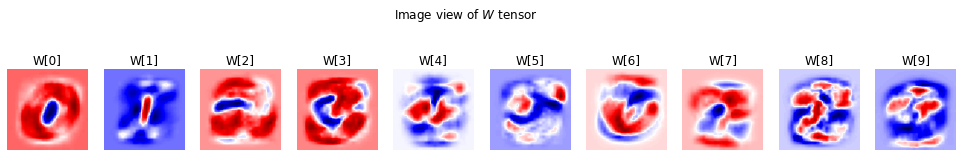

<Figure size 14400x216 with 0 Axes>

In [13]:
fig, ax = plt.subplots(1, 10, figsize=(17,3))
plt.figure(figsize=(200,3))
fig.suptitle('Image view of $W$ tensor')

for i in range(10):
	ax[ i ].imshow(model.W[:, i].detach().reshape(28,28), cmap='seismic')
	ax[ i ].set_title(f'W[{i}]')
	ax[ i ].set_axis_off()
	plt.imsave(f'./img/W[{i}]img.png', model.W[:, i].detach().reshape(28,28), cmap='seismic')